In [2]:
import numpy as np 
x = np.array([[0, 3,5,9], [1,9,5,9],[2,3,4,9],[2,4,4,9],[4,5,6,9]]).T
x


array([[0, 1, 2, 2, 4],
       [3, 9, 3, 4, 5],
       [5, 5, 4, 4, 6],
       [9, 9, 9, 9, 9]])

In [3]:
#covariance matrix 
np.cov(x)

array([[ 2.2 , -0.05,  0.45,  0.  ],
       [-0.05,  6.2 ,  0.7 ,  0.  ],
       [ 0.45,  0.7 ,  0.7 ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

In [4]:
# sample covariance matrix 
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from sklearn.datasets import make_gaussian_quantiles
real_cov = np.array([[.8, .3,7],
                     [.3, .4,0.5],
                     [.3, .6,.4]])


In [5]:
real_cov

array([[0.8, 0.3, 7. ],
       [0.3, 0.4, 0.5],
       [0.3, 0.6, 0.4]])

In [6]:
rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0,0,0],
                            cov=real_cov,
                            size=500)
cov = EmpiricalCovariance().fit(X)
cov.covariance_


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_2863/1470381038.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  X = rng.multivariate_normal(mean=[0,0,0],


array([[0.27365999, 0.31484671, 0.70410346],
       [0.31484671, 0.66073876, 0.16551754],
       [0.70410346, 0.16551754, 6.61152455]])

In [7]:
#eigenvalues and vectors 
import numpy as np
from numpy.linalg import eig

In [8]:
a = np.array([[185.47, 110.84], 
              [110.84, 77.58]])
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)

E-value: [254.79530715   8.25469285]
E-vector [[ 0.84782531 -0.53027562]
 [ 0.53027562  0.84782531]]


In [9]:
#Eigenvalues
#[254.79530715   8.25469285]  
#Eigenvector
#[[ 0.84782531 -0.53027562]
 #[ 0.53027562  0.84782531]]
    

In [10]:
np.dot(v[0],v[1])# they are perpendicular to each other 

2.437373035372848e-17

In [11]:
A=[19,25,22,-1,4,14,21,22,23,27,29,25,29,15,9,24,0,2,26,17,19,9,20,-6,-13,-13,-11,-4,-4,11,23]
B=[28,28,26,19,16,24,26,24,24,29,27,31,26,30,23,13,14,28,29,19,19,17,22,2,4,5,7,8,14,14,23]

np.shape(B)

(31,)

In [12]:
A=A-np.mean(A)
B=B-np.mean(B)


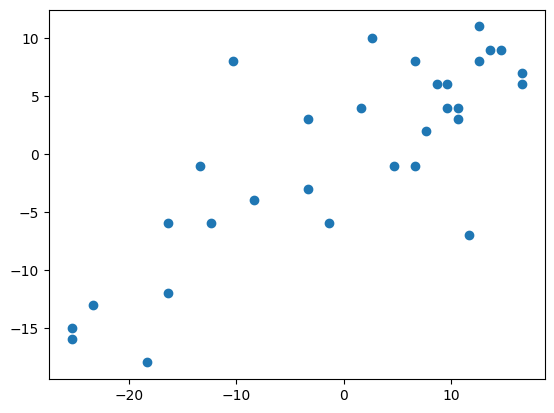

In [13]:
from matplotlib import pyplot as plt
plt.scatter(A,B)


In [14]:
import scipy.stats

print(np.mean(A), np.mean(B), np.std(A), np.std(B),scipy.stats.spearmanr(A,B) )

-3.43811001174242e-16 -9.168293364646454e-16 13.089144448486321 8.240278224897828 SignificanceResult(statistic=0.7294243910888952, pvalue=3.237276374402856e-06)


In [76]:
x = np.array([A,B])
print(x)
a = np.cov(x)
print(a)
w,v=eig(a)
# print('E-value:', w)
# print('E-vector', v)
#a

[[ 33  32  30  29  25  30  37  37  29  30  36  32  33  34  53  45  25  28
   32  27  26  28  24  26   9  22  17  26  27  30  34]
 [ 19  25  22  -1   4  14  21  22  23  27  29  25  29  15   9  24   0   2
   26  17  19   9  20  -6 -13 -13 -11  -4  -4  11  23]]
[[ 59.51612903  60.01397849]
 [ 60.01397849 177.03655914]]


In [78]:
v[0]

array([-0.92184697, -0.38755407])

In [79]:
#Angle of the anglular dierection of the eigenvectors
import math 

np.arctan(0.86892343/( -0.49494653))*180/3.14 #PC1

-60.36437755409954

In [18]:
print(A[15],B[15])

11.64516129032258 -6.967741935483872


In [19]:
#PC1
u1=0.86892343*(A[15])-0.49494653*(B[15])
u1

13.567413184193548

In [20]:
u2=0.49494653*(A[15])+(0.86892343)*(B[15])
u2

-0.29070205000000104

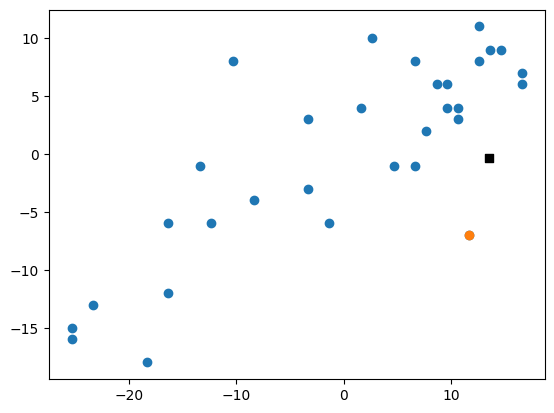

In [21]:
from matplotlib import pyplot as plt
plt.scatter(A,B)
plt.scatter(u1,u2, marker='s', color='k') # new projected point on a PC plane
plt.scatter(A[15],B[15]) # original point

In [22]:
#the maximum sample variation is 227.58036108 unit^2(eigen value #1 correponding to the pC1 or u1) .
#the second sample variation is 23.60028408 unit ^2 (eigen value #2 correponding to the pC2 or u2).
#THIS IMPLIS LESS VARIATION IN THE U2 direction

In [23]:
#variance explained?

In [24]:
var_exp_e1=(w[0]/(w[0]+w[1]))
var_exp_e1*100

92.37988399212558

In [25]:
# the data may be a time series
time=np.linspace(1,31,31)

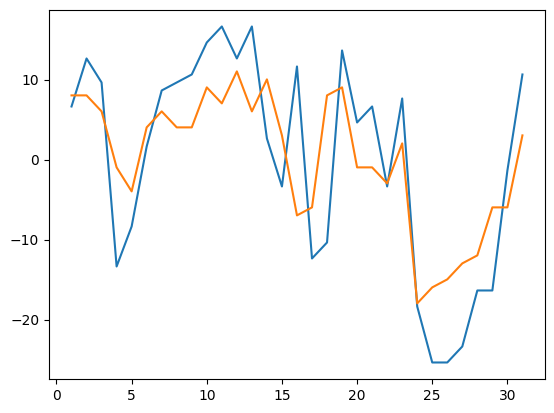

In [26]:
plt.plot(time,A)
plt.plot(time,B)

In [27]:
# so is the PC
#Lets construc the PC1 using all the values and teh eiogenvectors.
# note the first value of the eigenvector 1 is related to A and the second one is related to B
#E1 [[ 0.86892343 -0.49494653]
#E2 [ 0.49494653  0.86892343]]
#0.86892343 -0.49494653
PC1=[]
PC2=[]
for i in range(31):
    PC1.append( 0.86892343*A[i]-0.49494653*B[i])
    PC2.append( 0.49494653*A[i] + 0.86892343*B[i])

In [28]:
PC1

[1.7985980841935487,
 7.012138664193548,
 5.395261434193548,
 -11.125351745806453,
 -5.295895005806452,
 -0.5662329458064514,
 4.5263380041935495,
 6.385154494193549,
 7.25407792419355,
 8.255038994193548,
 10.982778914193549,
 5.527299074193549,
 11.477725444193549,
 -2.666988695806451,
 -4.415903565806452,
 13.567413184193548,
 -7.781695665806453,
 -12.973100225806453,
 7.38611556419355,
 4.515269994193549,
 6.253116854193549,
 -1.4462243858064519,
 5.637200694193549,
 -7.055877885806453,
 -14.128234955806452,
 -14.623181485806452,
 -13.87522768580645,
 -8.287710205806452,
 -11.257389385806453,
 1.776462064193548,
 7.74902445419355]

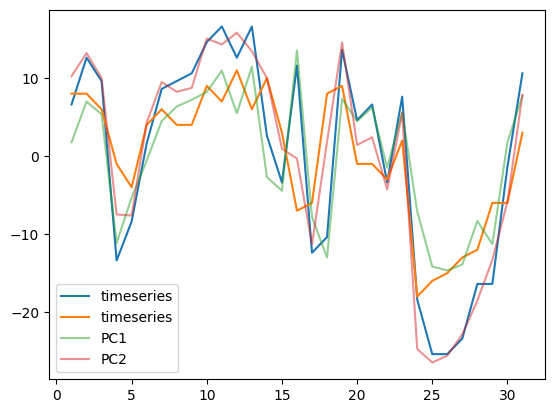

In [29]:
plt.plot(time,A,label='timeseries')
plt.plot(time,B,label='timeseries')
plt.plot(time,PC1,label='PC1',alpha=0.5)
plt.plot(time,PC2,label='PC2',alpha=0.5)
plt.legend()

In [30]:
#See the data and the PCs
#Note both the datasets A and B and PC1 and pC2 have same number of datapoints. 

In [31]:
scipy.stats.spearmanr(A,PC1) #  correlation between the first time series and PC1

SignificanceResult(statistic=0.9564167764029455, pvalue=4.801471330799633e-17)

In [32]:
# PC for multiple number of datasets  (not just 2 columns of data; now 4 columns OR 4 FEATURES )
A=[82.6,79.1,81.7,80.7,74.9,79.1,83.8,78.4,82.3,79.4]
B=[312.1,129.9,131.2,132.1,125,129.1,133.1,127,131.6,129.2]
C=[71,79,78,66,70,64,60,67,64,77]
D=[172,180,172,166,173,162,164,165,164,179]


In [33]:
A=(A-np.mean(A))/np.std(A)
B=(B-np.mean(B))/np.std(B)
C=(C-np.mean(C))/np.std(C)
D=(D-np.mean(D))/np.std(D)



In [34]:
x = np.array([A,B,C,D])
#eigenvalues and vectors 
import numpy as np
from numpy.linalg import eig
a = np.cov(x)
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)
A.shape

E-value: [2.27823864 1.46486905 0.59733857 0.10399819]
E-vector [[ 0.35446834  0.59263364  0.72030817  0.0655264 ]
 [ 0.00964426  0.77111378 -0.6330615  -0.06725822]
 [-0.65773467  0.15834366  0.25620516 -0.69041387]
 [-0.66456323  0.17057605  0.12144219  0.71729444]]


(10,)

In [35]:
x = np.array([A,B,C,D])
a = np.cov(x)
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)


E-value: [2.27823864 1.46486905 0.59733857 0.10399819]
E-vector [[ 0.35446834  0.59263364  0.72030817  0.0655264 ]
 [ 0.00964426  0.77111378 -0.6330615  -0.06725822]
 [-0.65773467  0.15834366  0.25620516 -0.69041387]
 [-0.66456323  0.17057605  0.12144219  0.71729444]]


In [36]:
# see four eigenvectors and four Eigenvalues.

# reconstruct teh PCs
PC1=[]
PC2=[]
PC3=[]
PC4=[]

for i in range(10):
    PC1.append( 0.35446834*A[i] + 0.59263364*B[i] + 0.72030817*C[i] + 0.0655264*D[i])
    PC2.append(  0.00964426*A[i] + 0.77111378*B[i] -0.6330615*C[i]  -0.06725822*D[i])
    PC3.append(-0.65773467*A[i] + 0.15834366 *B[i]+ 0.25620516*C[i] -0.69041387*D[i])
    PC4.append(-0.66456323*A[i] + 0.17057605 *B[i]+ 0.12144219 *C[i]+ 0.71729444*D[i])






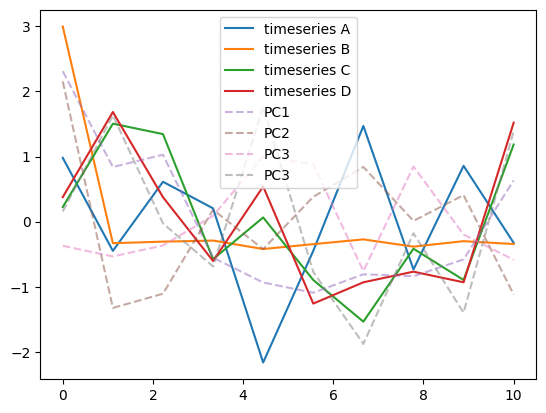

In [37]:
#And plotitng them.
plt.plot(np.linspace(0,10,10),A,label='timeseries A')
plt.plot(np.linspace(0,10,10),B,label='timeseries B')
plt.plot(np.linspace(0,10,10),C,label='timeseries C')
plt.plot(np.linspace(0,10,10),D,label='timeseries D')
plt.plot(np.linspace(0,10,10),PC1,label='PC1',alpha=0.5, linestyle='dashed')
plt.plot(np.linspace(0,10,10),PC2,label='PC2',alpha=0.5, linestyle='dashed')
plt.plot(np.linspace(0,10,10),PC3,label='PC3',alpha=0.5, linestyle='dashed')
plt.plot(np.linspace(0,10,10),PC4,label='PC3',alpha=0.5, linestyle='dashed')
plt.legend()

In [38]:
#canonical correlation:
A=[33,32,30,29,25,30,37,37,29,30,36,32,33,34,53,45,25,28,32,27,26,28,24,26,9,22,17,26,27,30,34]
B=[19,25,22,-1,4,14,21,22,23,27,29,25,29,15,9,24,0,2,26,17,19,9,20,-6,-13,-13,-11,-4,-4,11,23]
x = np.array([A,B])

In [39]:
C=[34,26,30,29,30,35,44,38,31,33,39,33,34,39,51,44,25,34,36,29,27,29,27,24,11,21,19,26,28,31,38]
D=[28,28,26,19,16,24,26,24,24,29,27,31,26,30,23,13,14,28,29,19,19,17,22,2,4,5,7,8,14,14,23]

y = np.array([C,D])

In [40]:
X = np.stack((A,B,C,D), axis=0)
a = np.cov(X)
a

array([[ 59.51612903,  60.01397849,  57.36021505,  34.02903226],
       [ 60.01397849, 177.03655914,  64.60107527,  90.11182796],
       [ 57.36021505,  64.60107527,  62.25591398,  40.98172043],
       [ 34.02903226,  90.11182796,  40.98172043,  70.1655914 ]])

In [41]:
X

array([[ 33,  32,  30,  29,  25,  30,  37,  37,  29,  30,  36,  32,  33,
         34,  53,  45,  25,  28,  32,  27,  26,  28,  24,  26,   9,  22,
         17,  26,  27,  30,  34],
       [ 19,  25,  22,  -1,   4,  14,  21,  22,  23,  27,  29,  25,  29,
         15,   9,  24,   0,   2,  26,  17,  19,   9,  20,  -6, -13, -13,
        -11,  -4,  -4,  11,  23],
       [ 34,  26,  30,  29,  30,  35,  44,  38,  31,  33,  39,  33,  34,
         39,  51,  44,  25,  34,  36,  29,  27,  29,  27,  24,  11,  21,
         19,  26,  28,  31,  38],
       [ 28,  28,  26,  19,  16,  24,  26,  24,  24,  29,  27,  31,  26,
         30,  23,  13,  14,  28,  29,  19,  19,  17,  22,   2,   4,   5,
          7,   8,  14,  14,  23]])

In [42]:
# here i =2 and j =2; so there will be two canonical vectors (M)

In [43]:
Sxx=np.cov(A,B)
Sxx

array([[ 59.51612903,  60.01397849],
       [ 60.01397849, 177.03655914]])

In [44]:
Syy=np.cov(C,D)
Syy

array([[62.25591398, 40.98172043],
       [40.98172043, 70.1655914 ]])

In [45]:

S=np.cov(x,y)# Transpose of Sxy

In [46]:
S

array([[ 59.51612903,  60.01397849,  57.36021505,  34.02903226],
       [ 60.01397849, 177.03655914,  64.60107527,  90.11182796],
       [ 57.36021505,  64.60107527,  62.25591398,  40.98172043],
       [ 34.02903226,  90.11182796,  40.98172043,  70.1655914 ]])

In [47]:
x1 = np.array([A,B]).T
y1 = np.array([C,D]).T
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=2)
cca.fit(x1,y1)
X_c, Y_c = cca.transform(x1,y1)

In [48]:
# Canonical VAriates
print(X_c)

[[ 0.44300862  0.2318187 ]
 [ 0.34865193  0.74143284]
 [ 0.07274309  0.6828892 ]
 [-0.1901915  -0.89118902]
 [-0.67806584 -0.21791022]
 [ 0.02623884  0.10807752]
 [ 0.97157417  0.06150013]
 [ 0.9773872   0.13335159]
 [-0.05067875  0.83324603]
 [ 0.10180825  1.0421465 ]
 [ 0.88884355  0.71481718]
 [ 0.34865193  0.74143284]
 [ 0.50113893  0.9503333 ]
 [ 0.54899136 -0.13409252]
 [ 2.96957576 -2.05680337]
 [ 2.02289225 -0.35098848]
 [-0.70131796 -0.50531607]
 [-0.30198728 -0.59712926]
 [ 0.35446496  0.8132843 ]
 [-0.34402668  0.55914802]
 [-0.46163549  0.78135631]
 [-0.26129606 -0.09416904]
 [-0.71429221  1.01021852]
 [-0.60696128 -1.0149302 ]
 [-2.84464533 -0.18329908]
 [-1.16459199 -1.20386893]
 [-1.79914029 -0.66763915]
 [-0.59533521 -0.87122728]
 [-0.46610034 -0.94973265]
 [ 0.00879975 -0.10747687]
 [ 0.59549561  0.44071917]]


In [49]:
scipy.stats.spearmanr(X_c[:,0],Y_c[:,0])

SignificanceResult(statistic=0.9002722643329992, pvalue=5.433312881624791e-12)

In [50]:
scipy.stats.spearmanr(A,X_c[:,0])# correlation between A and the first canonical vector X_c[0]

SignificanceResult(statistic=0.9965665058266899, pvalue=6.175702096205184e-33)

In [51]:
scipy.stats.spearmanr(B,X_c[:,0])# correlation between A and the first canonical vector X_c[0]

SignificanceResult(statistic=0.7074968972790957, pvalue=8.55709433117153e-06)

In [52]:
scipy.stats.spearmanr(A,X_c[:,1])# correlation between A and the first canonical vector X_c[0]

SignificanceResult(statistic=0.23893338942944167, pvalue=0.1954924236324643)

In [53]:
scipy.stats.spearmanr(B,X_c[:,1])# correlation between A and the first canonical vector X_c[0]

SignificanceResult(statistic=0.828170925965034, pvalue=8.929215419094392e-09)

In [54]:
aa=cca.predict(x.T)
cca.score(aa,y.T)

0.5300926190412523

In [55]:
y.T

array([[34, 28],
       [26, 28],
       [30, 26],
       [29, 19],
       [30, 16],
       [35, 24],
       [44, 26],
       [38, 24],
       [31, 24],
       [33, 29],
       [39, 27],
       [33, 31],
       [34, 26],
       [39, 30],
       [51, 23],
       [44, 13],
       [25, 14],
       [34, 28],
       [36, 29],
       [29, 19],
       [27, 19],
       [29, 17],
       [27, 22],
       [24,  2],
       [11,  4],
       [21,  5],
       [19,  7],
       [26,  8],
       [28, 14],
       [31, 14],
       [38, 23]])

In [56]:
np.shape(x)

(2, 31)

In [57]:
X_c

array([[ 0.44300862,  0.2318187 ],
       [ 0.34865193,  0.74143284],
       [ 0.07274309,  0.6828892 ],
       [-0.1901915 , -0.89118902],
       [-0.67806584, -0.21791022],
       [ 0.02623884,  0.10807752],
       [ 0.97157417,  0.06150013],
       [ 0.9773872 ,  0.13335159],
       [-0.05067875,  0.83324603],
       [ 0.10180825,  1.0421465 ],
       [ 0.88884355,  0.71481718],
       [ 0.34865193,  0.74143284],
       [ 0.50113893,  0.9503333 ],
       [ 0.54899136, -0.13409252],
       [ 2.96957576, -2.05680337],
       [ 2.02289225, -0.35098848],
       [-0.70131796, -0.50531607],
       [-0.30198728, -0.59712926],
       [ 0.35446496,  0.8132843 ],
       [-0.34402668,  0.55914802],
       [-0.46163549,  0.78135631],
       [-0.26129606, -0.09416904],
       [-0.71429221,  1.01021852],
       [-0.60696128, -1.0149302 ],
       [-2.84464533, -0.18329908],
       [-1.16459199, -1.20386893],
       [-1.79914029, -0.66763915],
       [-0.59533521, -0.87122728],
       [-0.46610034,

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
X,_ = load_iris(return_X_y=True, as_frame=True)

<Axes: >

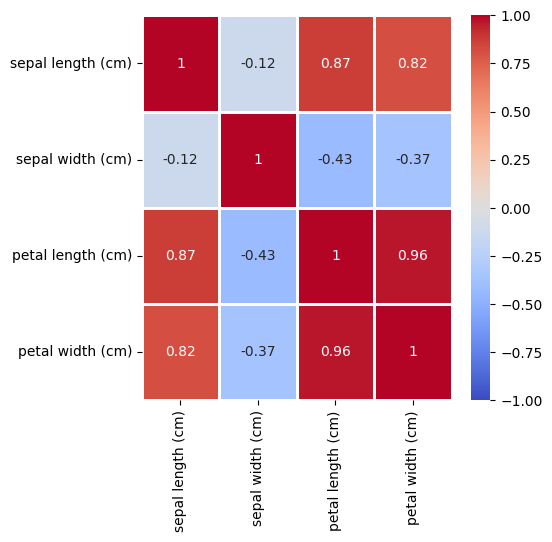

In [59]:
corr_coeff = X.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)

In [60]:
X1 = X.iloc[:, :2] # extract first two columns to create a sepal-related features dataset
X2 = X.iloc[:, 2:] # extract last two columns to create a petal-related features dataset

In [61]:
X2

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [62]:
scaler = StandardScaler() 
X1_sc = scaler.fit_transform(X1) #scale data
X2_sc = scaler.fit_transform(X2) 

In [63]:
n_comp=2 #choose number of canonical variates pairs 
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

In [64]:
X2_c

array([[-0.82621833, -0.12142658],
       [-0.82621833, -0.12142658],
       [-0.87981776, -0.03881152],
       [-0.7726189 , -0.20404163],
       [-0.82621833, -0.12142658],
       [-0.75300968,  0.04490229],
       [-0.87001315,  0.08566044],
       [-0.7726189 , -0.20404163],
       [-0.82621833, -0.12142658],
       [-0.72882407, -0.41112865],
       [-0.7726189 , -0.20404163],
       [-0.71901947, -0.28665669],
       [-0.78242351, -0.32851359],
       [-0.9432218 , -0.08066843],
       [-0.93341719,  0.04380354],
       [-0.86020855,  0.2101324 ],
       [-0.96740741,  0.37536251],
       [-0.87001315,  0.08566044],
       [-0.70921486, -0.16218473],
       [-0.81641372,  0.00304539],
       [-0.66542003, -0.36927174],
       [-0.86020855,  0.2101324 ],
       [-1.04061606,  0.20903365],
       [-0.79680451,  0.25198931],
       [-0.55822117, -0.53450185],
       [-0.71901947, -0.28665669],
       [-0.80660911,  0.12751735],
       [-0.7726189 , -0.20404163],
       [-0.82621833,

<BarContainer object of 2 artists>

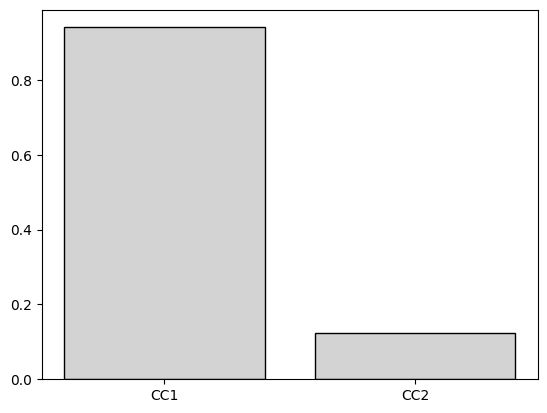

In [65]:
comp_corr = [np.corrcoef(X1_c[:, i], X2_c[:, i])[1][0] for i in range(n_comp)]
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')

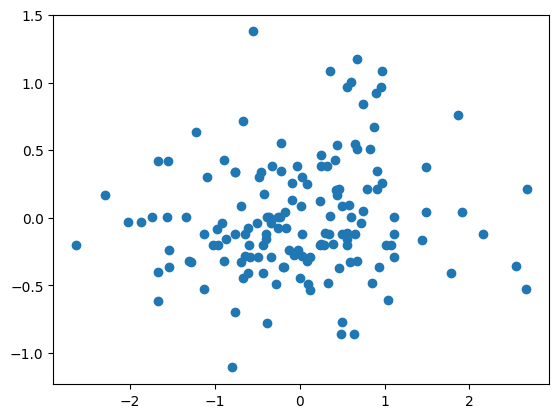

In [66]:
plt.scatter(X1_c[:,1],X2_c[:,1])

In [67]:
cca.x_loadings_ #get loadings for canonical variate of X1 dataset

array([[ 0.89224641,  0.3880084 ],
       [-0.45786609,  0.92165584]])

In [68]:
X1_c

array([[-1.22550031e+00,  4.96811606e-01],
       [-1.00225906e+00, -6.41106902e-01],
       [-1.40424577e+00, -3.41279745e-01],
       [-1.42660257e+00, -6.02150642e-01],
       [-1.42649366e+00,  6.46725185e-01],
       [-1.24774820e+00,  1.48481654e+00],
       [-1.69455740e+00,  1.40260717e-02],
       [-1.24785710e+00,  2.35940709e-01],
       [-1.47131616e+00, -1.12389244e+00],
       [-1.09157734e+00, -4.35714664e-01],
       [-1.06911164e+00,  1.07403206e+00],
       [-1.47120725e+00,  1.24983390e-01],
       [-1.11393414e+00, -6.96585562e-01],
       [-1.67230951e+00, -9.73978858e-01],
       [-8.90366175e-01,  1.91212341e+00],
       [-1.35931437e+00,  2.67821370e+00],
       [-1.24774820e+00,  1.48481654e+00],
       [-1.22550031e+00,  4.96811606e-01],
       [-8.23404692e-01,  1.44586028e+00],
       [-1.49345514e+00,  1.11298832e+00],
       [-8.01156802e-01,  4.57855346e-01],
       [-1.40413686e+00,  9.07596082e-01],
       [-1.87319396e+00,  4.24810548e-01],
       [-1.

In [69]:
X2_sc

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

In [70]:
scipy.stats.pearsonr(X1_sc[:,1],X1_c[:,0])

PearsonRResult(statistic=-0.4767281671307459, pvalue=6.958628003421033e-10)

In [71]:
aa=cca.predict(X1_sc)
cca.score(aa,X2_sc)
scipy.stats.pearsonr(aa[:,1],X2_sc[:,1])

PearsonRResult(statistic=0.765321120408911, pvalue=4.076043353342705e-30)